In [14]:
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn.svm import SVC
from sklearn import svm
from sklearn.decomposition import PCA

from sklearn. decomposition import PCA as RandomizedPCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler 
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import mean_squared_error 
import matplotlib.pyplot as plt

from sklearn import metrics

import warnings 
warnings.filterwarnings('ignore')


import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns; sns.set()
from sklearn import metrics

from sklearn.model_selection import train_test_split

In [15]:
df = pd.read_csv('/content/sample_data/forestfires.csv')
#  updated has all float values of area removed-
# df = pd.read_csv('https://raw.githubusercontent.com/Onkar-Indurkar/Intro-to-ML/main/forestfiresUpdated.csv') 
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [16]:
m = len(df)
m

517

In [17]:
list1 = ['month']

def binary_map (v1) :
    return v1.map({'jan' : 0, "feb": 1, "mar":2, "apr":3, "may":4, "jun":5, "jul":6, 'aug' : 7, "sep": 8, "oct":9, 'nov' : 10, "dec": 11})

df[list1] = df[list1] . apply(binary_map)
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,2,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,9,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,9,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,2,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,2,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [18]:
list2 = ['day']

def binary_map (v2) :
    return v2.map({'mon' : 0, "tue": 1, 'wed' : 2, "thu": 3, 'fri' : 4, "sat": 5, 'sun' : 6 })

df[list2] = df[list2] . apply(binary_map)
df.tail()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
512,4,3,7,6,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,7,6,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,7,6,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,7,5,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00
516,6,3,10,1,79.5,3.0,106.7,1.1,11.8,31,4.5,0.0,0.00


In [19]:
x = df.iloc[:, 0:11].values #1st 12 cols
y = df.iloc[:, 12].values   #13th col 
y[y!=0] = 1
y = y.astype(int)
x = x.astype(int)

# y= np.log(y) 
# y = np.log10(y)
y = y.reshape(-1,1)
x

array([[ 7,  5,  2, ...,  8, 51,  6],
       [ 7,  4,  9, ..., 18, 33,  0],
       [ 7,  4,  9, ..., 14, 33,  1],
       ...,
       [ 7,  4,  7, ..., 21, 70,  6],
       [ 1,  4,  7, ..., 25, 42,  4],
       [ 6,  3, 10, ..., 11, 31,  4]])

In [20]:
from sklearn import preprocessing
from sklearn import utils

lab_enc = preprocessing.LabelEncoder()
encoded = lab_enc.fit_transform(y)

print(utils.multiclass.type_of_target(y))

print(utils.multiclass.type_of_target(y.astype('int')))

print(utils.multiclass.type_of_target(encoded))

binary
binary
binary


Naive Bayes Model

In [21]:
#spliting the dataset

X_train, X_test, Y_train, Y_test = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state = 0)

In [22]:

#scaling/standardizing the dataset
from sklearn.preprocessing import StandardScaler 
sc_X = StandardScaler()

X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [23]:
model = GaussianNB()
model.fit(X_train,Y_train)

GaussianNB()

In [24]:
yTest = Y_test
pred = model.predict(X_test)
print(metrics.classification_report(yTest,pred))
print(metrics.confusion_matrix(yTest,pred))

              precision    recall  f1-score   support

           0       0.65      0.30      0.41        44
           1       0.63      0.88      0.74        60

    accuracy                           0.63       104
   macro avg       0.64      0.59      0.57       104
weighted avg       0.64      0.63      0.60       104

[[13 31]
 [ 7 53]]


Text(0.5, 427.9555555555555, 'Predicted label')

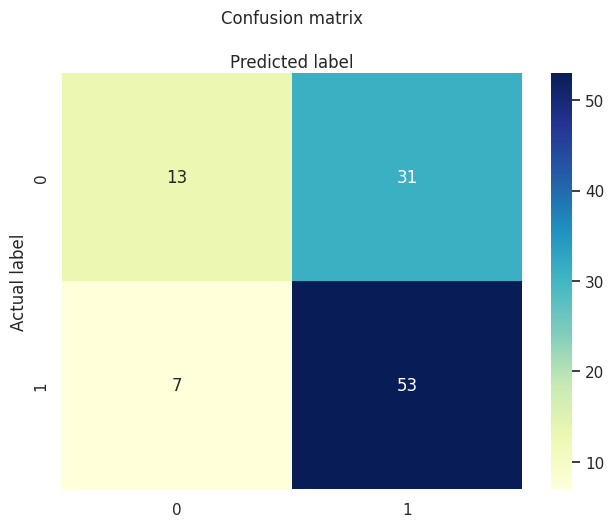

In [27]:
from sklearn.metrics import confusion_matrix

class_names=[0,1] # name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create confusion matrix
cnf_matrix = confusion_matrix(yTest,pred)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

3rd Column - Month

In [28]:
x = df.iloc[:, 2].values # 3rd cols
y = df.iloc[:, 12].values   #13th col 
y[y!=0] = 1
y = y.astype(int)
x = x.astype(int)

# y= np.log(y) 
# y = np.log10(y)
y = y.reshape(-1,1)
x = x.reshape(-1,1)

In [29]:
#spliting the dataset

X_train, X_test, Y_train, Y_test = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state = 0)

In [30]:
#scaling/standardizing the dataset
from sklearn.preprocessing import StandardScaler 
sc_X = StandardScaler()

X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [31]:
model = GaussianNB()
model.fit(X_train,Y_train)

GaussianNB()

In [32]:
yTest = Y_test
pred = model.predict(X_test)
print(metrics.classification_report(yTest,pred))
print(metrics.confusion_matrix(yTest,pred))

              precision    recall  f1-score   support

           0       0.68      0.30      0.41        44
           1       0.64      0.90      0.74        60

    accuracy                           0.64       104
   macro avg       0.66      0.60      0.58       104
weighted avg       0.66      0.64      0.60       104

[[13 31]
 [ 6 54]]


Text(0.5, 427.9555555555555, 'Predicted label')

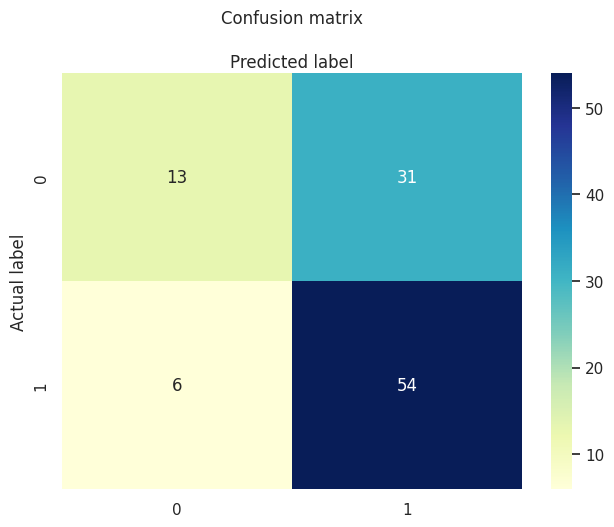

In [33]:
from sklearn.metrics import confusion_matrix

class_names=[0,1] # name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create confusion matrix
cnf_matrix = confusion_matrix(yTest,pred)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

4th Column - Day

In [34]:
x = df.iloc[:, 3].values # 3rd cols
y = df.iloc[:, 12].values   #13th col 
y[y!=0] = 1
y = y.astype(int)
x = x.astype(int)

# y= np.log(y) 
# y = np.log10(y)
y = y.reshape(-1,1)
x = x.reshape(-1,1)

In [35]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state = 0)

In [36]:
#scaling/standardizing the dataset
from sklearn.preprocessing import StandardScaler 
sc_X = StandardScaler()

X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [37]:
model = GaussianNB()
model.fit(X_train,Y_train)

GaussianNB()

In [38]:
yTest = Y_test
pred = model.predict(X_test)
print(metrics.classification_report(yTest,pred))
print(metrics.confusion_matrix(yTest,pred))

              precision    recall  f1-score   support

           0       0.42      0.57      0.49        44
           1       0.58      0.43      0.50        60

    accuracy                           0.49       104
   macro avg       0.50      0.50      0.49       104
weighted avg       0.51      0.49      0.49       104

[[25 19]
 [34 26]]


Text(0.5, 427.9555555555555, 'Predicted label')

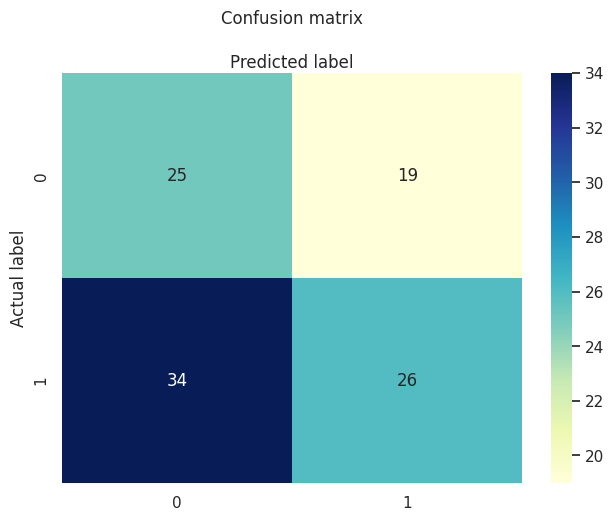

In [39]:
from sklearn.metrics import confusion_matrix

class_names=[0,1] # name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create confusion matrix
cnf_matrix = confusion_matrix(yTest,pred)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

5TH COL - FFMC

In [40]:
x = df.iloc[:, 4].values # 3rd cols
y = df.iloc[:, 12].values   #13th col 
y[y!=0] = 1
y = y.astype(int)
x = x.astype(int)

# y= np.log(y) 
# y = np.log10(y)
y = y.reshape(-1,1)
x = x.reshape(-1,1)

In [41]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state = 0)

In [42]:
#scaling/standardizing the dataset
from sklearn.preprocessing import StandardScaler 
sc_X = StandardScaler()

X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [43]:
model = GaussianNB()
model.fit(X_train,Y_train)

GaussianNB()

In [44]:
yTest = Y_test
pred = model.predict(X_test)
print(metrics.classification_report(yTest,pred))
print(metrics.confusion_matrix(yTest,pred))

              precision    recall  f1-score   support

           0       0.54      0.16      0.25        44
           1       0.59      0.90      0.72        60

    accuracy                           0.59       104
   macro avg       0.57      0.53      0.48       104
weighted avg       0.57      0.59      0.52       104

[[ 7 37]
 [ 6 54]]


Text(0.5, 427.9555555555555, 'Predicted label')

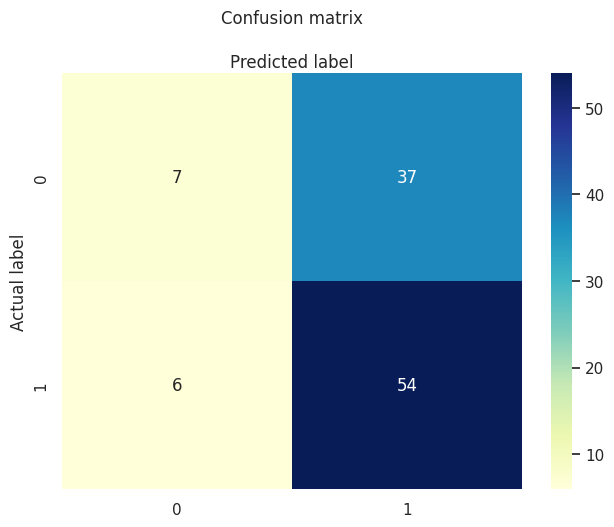

In [45]:
from sklearn.metrics import confusion_matrix

class_names=[0,1] # name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create confusion matrix
cnf_matrix = confusion_matrix(yTest,pred)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

6TH COL - DMC

In [46]:
x = df.iloc[:, 5].values # 3rd cols
y = df.iloc[:, 12].values   #13th col 
y[y!=0] = 1
y = y.astype(int)
x = x.astype(int)

# y= np.log(y) 
# y = np.log10(y)
y = y.reshape(-1,1)
x = x.reshape(-1,1)

In [47]:
#spliting the dataset

X_train, X_test, Y_train, Y_test = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state = 0)

In [48]:
#scaling/standardizing the dataset
from sklearn.preprocessing import StandardScaler 
sc_X = StandardScaler()

X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [49]:
model = GaussianNB()
model.fit(X_train,Y_train)

GaussianNB()

In [50]:
yTest = Y_test
pred = model.predict(X_test)
print(metrics.classification_report(yTest,pred))
print(metrics.confusion_matrix(yTest,pred))

              precision    recall  f1-score   support

           0       0.57      0.30      0.39        44
           1       0.62      0.83      0.71        60

    accuracy                           0.61       104
   macro avg       0.59      0.56      0.55       104
weighted avg       0.60      0.61      0.57       104

[[13 31]
 [10 50]]


Text(0.5, 427.9555555555555, 'Predicted label')

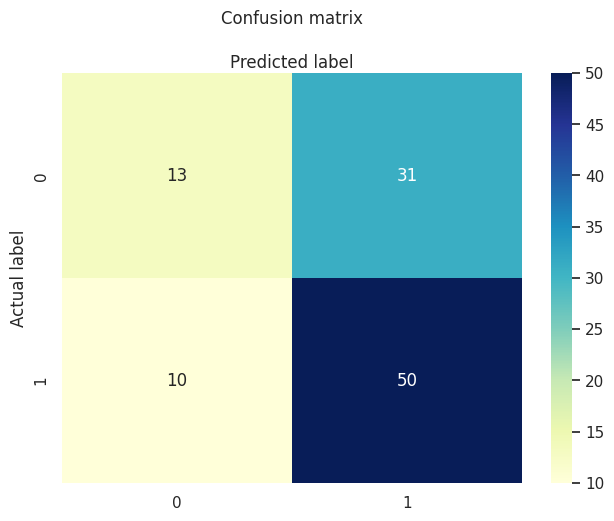

In [51]:
from sklearn.metrics import confusion_matrix

class_names=[0,1] # name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create confusion matrix
cnf_matrix = confusion_matrix(yTest,pred)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

7TH COL - DC



In [52]:
x = df.iloc[:, 6].values # 3rd cols
y = df.iloc[:, 12].values   #13th col 
y[y!=0] = 1
y = y.astype(int)
x = x.astype(int)

# y= np.log(y) 
# y = np.log10(y)
y = y.reshape(-1,1)
x = x.reshape(-1,1)

In [53]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state = 0)

In [54]:
#scaling/standardizing the dataset
from sklearn.preprocessing import StandardScaler 
sc_X = StandardScaler()

X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [55]:
model = GaussianNB()
model.fit(X_train,Y_train)

GaussianNB()

In [56]:
yTest = Y_test
pred = model.predict(X_test)
print(metrics.classification_report(yTest,pred))
print(metrics.confusion_matrix(yTest,pred))

              precision    recall  f1-score   support

           0       0.65      0.30      0.41        44
           1       0.63      0.88      0.74        60

    accuracy                           0.63       104
   macro avg       0.64      0.59      0.57       104
weighted avg       0.64      0.63      0.60       104

[[13 31]
 [ 7 53]]


Text(0.5, 427.9555555555555, 'Predicted label')

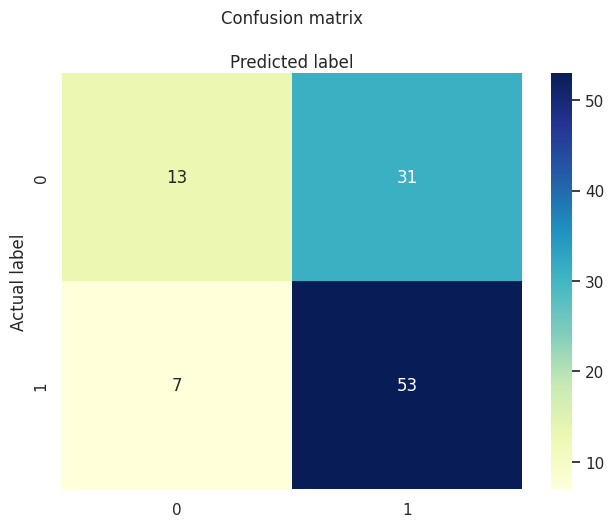

In [57]:
from sklearn.metrics import confusion_matrix

class_names=[0,1] # name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create confusion matrix
cnf_matrix = confusion_matrix(yTest,pred)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

8TH COL - ISI

In [58]:
x = df.iloc[:, 7].values # 3rd cols
y = df.iloc[:, 12].values   #13th col 
y[y!=0] = 1
y = y.astype(int)
x = x.astype(int)

# y= np.log(y) 
# y = np.log10(y)
y = y.reshape(-1,1)
x = x.reshape(-1,1)

In [59]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state = 0)

In [60]:
#scaling/standardizing the dataset
from sklearn.preprocessing import StandardScaler 
sc_X = StandardScaler()

X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [61]:

model = GaussianNB()
model.fit(X_train,Y_train)

GaussianNB()

In [62]:
yTest = Y_test
pred = model.predict(X_test)
print(metrics.classification_report(yTest,pred))
print(metrics.confusion_matrix(yTest,pred))

              precision    recall  f1-score   support

           0       0.50      0.25      0.33        44
           1       0.60      0.82      0.69        60

    accuracy                           0.58       104
   macro avg       0.55      0.53      0.51       104
weighted avg       0.56      0.58      0.54       104

[[11 33]
 [11 49]]


Text(0.5, 427.9555555555555, 'Predicted label')

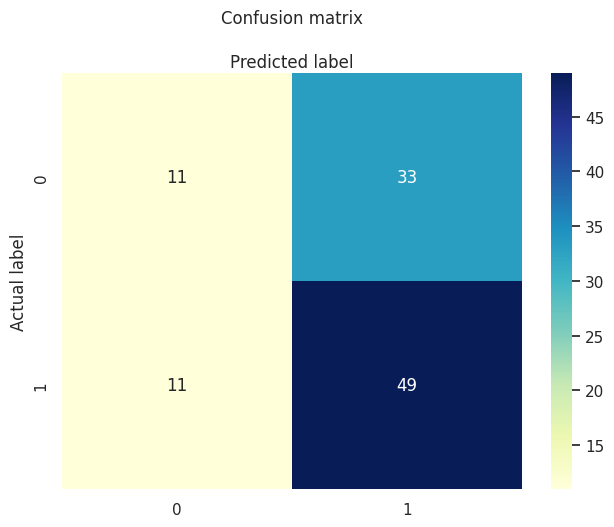

In [63]:
from sklearn.metrics import confusion_matrix

class_names=[0,1] # name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create confusion matrix
cnf_matrix = confusion_matrix(yTest,pred)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

9TH COL - TEMP

In [64]:
x = df.iloc[:, 8].values # 3rd cols
y = df.iloc[:, 12].values   #13th col 
y[y!=0] = 1
y = y.astype(int)
x = x.astype(int)

# y= np.log(y) 
# y = np.log10(y)
y = y.reshape(-1,1)
x = x.reshape(-1,1)

In [65]:
#spliting the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state = 0)

In [66]:
#scaling/standardizing the dataset
from sklearn.preprocessing import StandardScaler 
sc_X = StandardScaler()

X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [67]:

model = GaussianNB()
model.fit(X_train,Y_train)

GaussianNB()

In [68]:
yTest = Y_test
pred = model.predict(X_test)
print(metrics.classification_report(yTest,pred))
print(metrics.confusion_matrix(yTest,pred))

              precision    recall  f1-score   support

           0       0.48      0.68      0.56        44
           1       0.66      0.45      0.53        60

    accuracy                           0.55       104
   macro avg       0.57      0.57      0.55       104
weighted avg       0.58      0.55      0.55       104

[[30 14]
 [33 27]]


Text(0.5, 427.9555555555555, 'Predicted label')

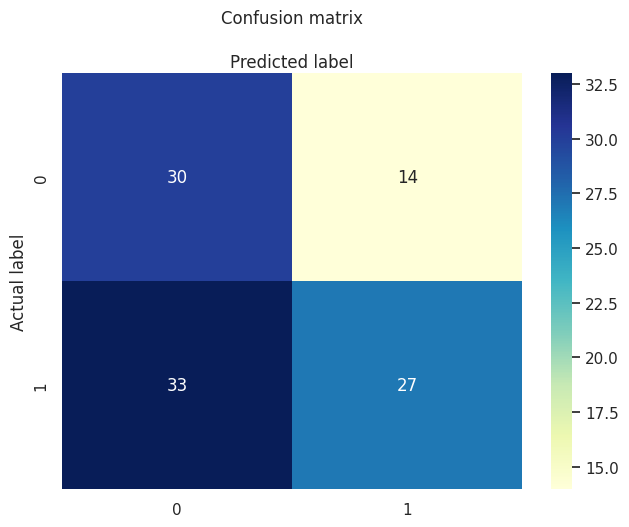

In [69]:
from sklearn.metrics import confusion_matrix

class_names=[0,1] # name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create confusion matrix
cnf_matrix = confusion_matrix(yTest,pred)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

10TH COL - RH

In [70]:
x = df.iloc[:, 9].values # 3rd cols
y = df.iloc[:, 12].values   #13th col 
y[y!=0] = 1
y = y.astype(int)
x = x.astype(int)

# y= np.log(y) 
# y = np.log10(y)
y = y.reshape(-1,1)
x = x.reshape(-1,1)

In [71]:
#spliting the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state = 0)

In [72]:
#scaling/standardizing the dataset
from sklearn.preprocessing import StandardScaler 
sc_X = StandardScaler()

X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [73]:

model = GaussianNB()
model.fit(X_train,Y_train)

GaussianNB()

In [74]:
yTest = Y_test
pred = model.predict(X_test)
print(metrics.classification_report(yTest,pred))
print(metrics.confusion_matrix(yTest,pred))

              precision    recall  f1-score   support

           0       0.50      0.30      0.37        44
           1       0.60      0.78      0.68        60

    accuracy                           0.58       104
   macro avg       0.55      0.54      0.53       104
weighted avg       0.56      0.58      0.55       104

[[13 31]
 [13 47]]


Text(0.5, 427.9555555555555, 'Predicted label')

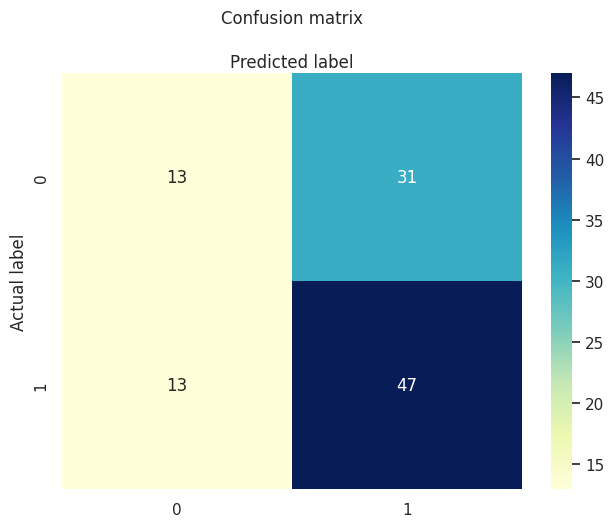

In [75]:
from sklearn.metrics import confusion_matrix

class_names=[0,1] # name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create confusion matrix
cnf_matrix = confusion_matrix(yTest,pred)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

11TH COL - WIND

In [76]:
x = df.iloc[:, 10].values # 3rd cols
y = df.iloc[:, 12].values   #13th col 
y[y!=0] = 1
y = y.astype(int)
x = x.astype(int)

# y= np.log(y) 
# y = np.log10(y)
y = y.reshape(-1,1)
x = x.reshape(-1,1)

In [77]:
#spliting the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state = 0)

In [78]:
#scaling/standardizing the dataset
from sklearn.preprocessing import StandardScaler 
sc_X = StandardScaler()

X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [79]:

model = GaussianNB()
model.fit(X_train,Y_train)

GaussianNB()

In [80]:
yTest = Y_test
pred = model.predict(X_test)
print(metrics.classification_report(yTest,pred))
print(metrics.confusion_matrix(yTest,pred))

              precision    recall  f1-score   support

           0       0.41      0.70      0.52        44
           1       0.55      0.27      0.36        60

    accuracy                           0.45       104
   macro avg       0.48      0.49      0.44       104
weighted avg       0.49      0.45      0.43       104

[[31 13]
 [44 16]]


Text(0.5, 427.9555555555555, 'Predicted label')

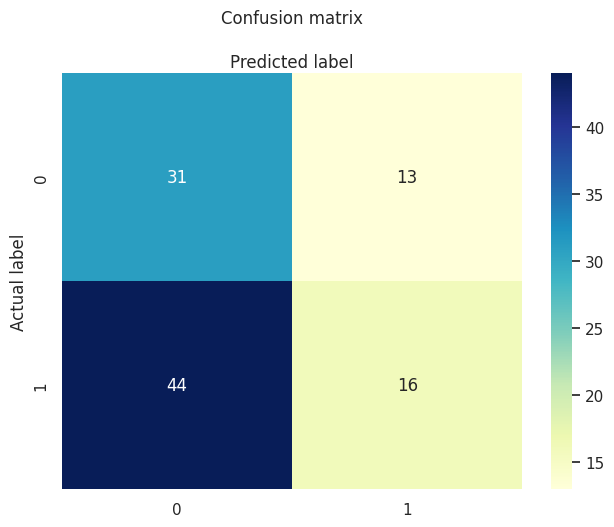

In [81]:
from sklearn.metrics import confusion_matrix

class_names=[0,1] # name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create confusion matrix
cnf_matrix = confusion_matrix(yTest,pred)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

12TH COL - RAIN

In [82]:
x = df.iloc[:, 11].values # 3rd cols
y = df.iloc[:, 12].values   #13th col 
y[y!=0] = 1
y = y.astype(int)
x = x.astype(int)

# y= np.log(y) 
# y = np.log10(y)
y = y.reshape(-1,1)
x = x.reshape(-1,1)

In [83]:
#spliting the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state = 0)

In [84]:
#scaling/standardizing the dataset
from sklearn.preprocessing import StandardScaler 
sc_X = StandardScaler()

X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [85]:

model = GaussianNB()
model.fit(X_train,Y_train)

GaussianNB()

In [86]:
yTest = Y_test
pred = model.predict(X_test)
print(metrics.classification_report(yTest,pred))
print(metrics.confusion_matrix(yTest,pred))

              precision    recall  f1-score   support

           0       0.42      1.00      0.59        44
           1       0.00      0.00      0.00        60

    accuracy                           0.42       104
   macro avg       0.21      0.50      0.30       104
weighted avg       0.18      0.42      0.25       104

[[44  0]
 [60  0]]


Text(0.5, 427.9555555555555, 'Predicted label')

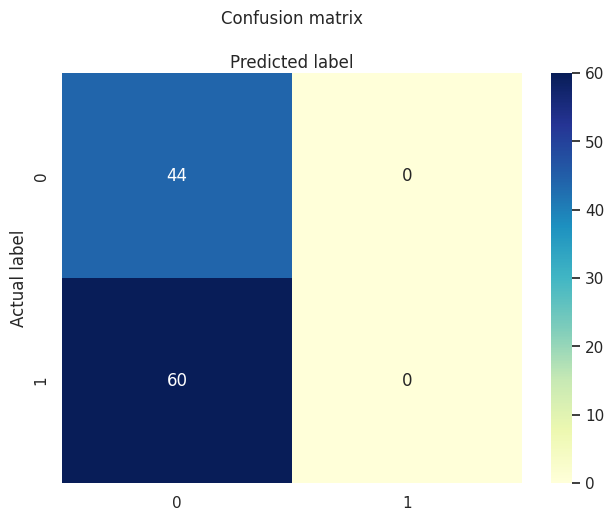

In [87]:
from sklearn.metrics import confusion_matrix

class_names=[0,1] # name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create confusion matrix
cnf_matrix = confusion_matrix(yTest,pred)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')